In [156]:
import os
import joblib
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
import random
import sklearn
import imblearn
from imblearn.ensemble import BalancedRandomForestClassifier, BalancedBaggingClassifier, EasyEnsembleClassifier, RUSBoostClassifier
import xgboost as xgb
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, AdaBoostRegressor 
from sklearn import linear_model, svm, tree
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_predict
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.preprocessing import MinMaxScaler
from sklearn.base import BaseEstimator, RegressorMixin

# Set the seed for Python's random module
random.seed(42)

# Set the seed for NumPy
np.random.seed(42)


target_cols = [
    'success',
    'collection_ratio',
    'num_backers'
]

# Import data
df= pd.read_csv('/workspaces/Crowdfunding-Social-Media-Drivers/Data/final_datasets/domain_post.csv')

#load_scaler
scaler = MinMaxScaler()
scaler = joblib.load('./02_success_engagement/domain_post_scaler.pkl')

df.head()
train, test = train_test_split(df, test_size=0.2, random_state=42, stratify=df['success'])

In [2]:
df_minority = train.copy()

In [52]:
smotenc= imblearn.over_sampling.SMOTENC(categorical_features=['Person',
                                        'Team', 'category_art', 'category_comics',
                                        'category_crafts', 'category_dance', 'category_design',
                                        'category_fashion', 'category_film_Video', 'category_food',
                                        'category_games', 'category_journalism', 'category_music',
                                        'category_photography', 'category_publishing', 'category_technology',
                                        'category_theater', 'region_Africa', 'region_Asia', 'region_Europe',
                                        'region_North America', 'region_Oceania', 'region_Other',
                                        'region_South America', 'duration_<1 week', 'duration_1-2 weeks',
                                        'duration_2 weeks - 1 month', 'duration_1-2 months',
                                        'fb_post_sponsored', 'fb_type_link', 'fb_type_photo', 'fb_type_video', 'fb_entity_ORG',
                                        'fb_entity_PERSON', 'fb_entity_DATE', 'fb_entity_CARDINAL',
                                        'fb_entity_GPE', 'fb_entity_PRODUCT', 'fb_entity_WORK_OF_ART',
                                        'fb_entity_ORDINAL', 'fb_entity_MONEY', 'fb_entity_TIME',
                                        'fb_entity_NORP',],
                                        sampling_strategy=0.5, k_neighbors=7, random_state=42,
                                        n_jobs=-1
                                        )

X_resampled, y_resampled = smotenc.fit_resample(df_minority.drop(target_cols, axis=1), df_minority['success'], 
                                                )

X_resampled = pd.DataFrame(X_resampled, columns=df_minority.drop(target_cols, axis=1).columns)
y_resampled = pd.DataFrame(y_resampled)

df_resampled = pd.concat([X_resampled, y_resampled], axis=1)
df_resampled


/home/codespace/.python/current/lib/python3.10/site-packages/imblearn/over_sampling/_smote/base.py:619: FutureWarning: The parameter `n_jobs` has been deprecated in 0.10 and will be removed in 0.12. You can pass an nearest neighbors estimator where `n_jobs` is already set instead.
  warnings.warn(
/home/codespace/.python/current/lib/python3.10/site-packages/imblearn/over_sampling/_smote/base.py:345: FutureWarning: The parameter `n_jobs` has been deprecated in 0.10 and will be removed in 0.12. You can pass an nearest neighbors estimator where `n_jobs` is already set instead.
  warnings.warn(


,pledge_types,start_month,start_day,population,Person,Team,num_projects,num_backed,category_art,category_comics,...,fb_entity_DATE,fb_entity_CARDINAL,fb_entity_GPE,fb_entity_PRODUCT,fb_entity_WORK_OF_ART,fb_entity_ORDINAL,fb_entity_MONEY,fb_entity_TIME,fb_entity_NORP,success
0,14,10,1,0.338637,0,1,0,0,0,0,...,1,0,0,0,0,0,0,0,0,1
1,9,6,0,0.004030,0,1,0,0,1,0,...,0,0,1,0,0,1,0,0,0,1
2,6,4,1,0.190286,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
3,13,6,0,0.550925,0,1,0,0,0,0,...,0,1,0,0,0,0,0,0,1,1
4,12,3,3,0.489703,0,1,0,0,0,0,...,0,0,1,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
934,14,9,0,0.097820,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
935,6,3,1,0.061089,0,1,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
936,6,4,0,0.267029,0,1,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
937,6,12,1,0.023708,0,1,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0


In [53]:
categorical_features = ['Person',
                        'Team', 'category_art', 'category_comics',
                        'category_crafts', 'category_dance', 'category_design',
                        'category_fashion', 'category_film_Video', 'category_food',
                        'category_games', 'category_journalism', 'category_music',
                        'category_photography', 'category_publishing', 'category_technology',
                        'category_theater', 'region_Africa', 'region_Asia', 'region_Europe',
                        'region_North America', 'region_Oceania', 'region_Other',
                        'region_South America', 'duration_<1 week', 'duration_1-2 weeks',
                        'duration_2 weeks - 1 month', 'duration_1-2 months',
                        'fb_post_sponsored', 'fb_type_link', 'fb_type_photo', 'fb_type_video', 'fb_entity_ORG',
                        'fb_entity_PERSON', 'fb_entity_DATE', 'fb_entity_CARDINAL',
                        'fb_entity_GPE', 'fb_entity_PRODUCT', 'fb_entity_WORK_OF_ART',
                        'fb_entity_ORDINAL', 'fb_entity_MONEY', 'fb_entity_TIME',
                        'fb_entity_NORP',]

person_team = ['Person', 'Team']
category = [x for x in categorical_features if x.startswith('category')]
region = [x for x in categorical_features if x.startswith('region')]
duration = [x for x in categorical_features if x.startswith('duration')]
fb_post_type = [x for x in categorical_features if x.startswith('fb_type')]
fb_entity = [x for x in categorical_features if x.startswith('fb_entity')]


df_resampled.loc[df_resampled[df_resampled[region].sum(axis=1) == 0].index, 'region_North America'] = 1
null_category_index = df_resampled[df_resampled[category].sum(axis=1) ==0].index
random_add_category = np.random.choice(category, size=len(null_category_index), replace=True)
for i in range(len(null_category_index)):
    df_resampled.loc[null_category_index[i], random_add_category[i]] = 1

In [54]:
x_train = df_resampled.drop('success', axis=1).values
y_train = df_resampled['success']

x_test = test.drop(target_cols, axis=1).values
y_test = test['success']

In [55]:
from sklearn.metrics import f1_score, precision_score, recall_score, accuracy_score

# Train and evaluate models
models = {
    'Logistic Regression': linear_model.LogisticRegression(),
    'Support Vector Machine': svm.SVC(class_weight='balanced'),
    'Decision Tree': tree.DecisionTreeClassifier(),
    'Random Forest': RandomForestRegressor(n_estimators=500, n_jobs=-1, max_depth=5),
    'Gradient Boosting': GradientBoostingRegressor(n_estimators=500, learning_rate=0.01, subsample=0.9, max_depth=5),
    'AdaBoost': AdaBoostRegressor(n_estimators=500),
    'Balanced Random Forest': BalancedRandomForestClassifier(n_estimators=500),
    'Balanced Bagging': BalancedBaggingClassifier(n_estimators=500, n_jobs=-1, sampling_strategy='auto'),
    'Easy Ensemble': EasyEnsembleClassifier(n_estimators=500, n_jobs=-1, sampling_strategy='auto'),
    'XGBoost': xgb.XGBClassifier(n_estimators=500, n_jobs=-1, learning_rate=0.01, subsample=0.9, colsample_bytree=0.9, max_depth=5)
}

results = {}
model_dict={}
for model_name, model in models.items():
    model.fit(x_train, y_train)
    y_pred = model.predict(x_test)
    
    # Convert y_pred to binary
    y_pred_binary = [1 if pred >= 0.5 else 0 for pred in y_pred]
    
    f1 = f1_score(y_test, y_pred_binary)
    precision = precision_score(y_test, y_pred_binary)
    recall = recall_score(y_test, y_pred_binary)
    accuracy = accuracy_score(y_test, y_pred_binary)

    cmat = confusion_matrix(y_test, y_pred_binary)
    Failed_cases_acc= cmat[0,0]/cmat.sum(axis=1)[0]
    Success_cases_acc = cmat[1,1]/cmat.sum(axis=1)[1]
    
    results[model_name] = {
        'F1 Score': f1,
        'Precision': precision,
        'Recall': recall,
        'Accuracy': accuracy,
        'Failed_cases_acc': Failed_cases_acc,
        'Success_cases_acc': Success_cases_acc
    }
    model_dict[model_name] = model

pd.DataFrame(results).T.sort_values(['F1 Score','Failed_cases_acc'], ascending=False).loc[:, ['F1 Score', 'Failed_cases_acc', 'Success_cases_acc']]

/home/codespace/.python/current/lib/python3.10/site-packages/imblearn/ensemble/_forest.py:546: FutureWarning: The default of `sampling_strategy` will change from `'auto'` to `'all'` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `'all'` to silence this warning and adopt the future behaviour.
  warn(
/home/codespace/.python/current/lib/python3.10/site-packages/imblearn/ensemble/_forest.py:558: FutureWarning: The default of `replacement` will change from `False` to `True` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `True` to silence this warning and adopt the future behaviour.
  warn(


In [47]:
pred= models['Balanced Bagging'].predict(x_test)
pred_binary = [1 if pred >= 0.5 else 0 for pred in pred]
print(classification_report(y_test, pred_binary))
cmat = confusion_matrix(y_test, pred_binary)
Failed_cases_acc= cmat[0,0]/cmat.sum(axis=1)[0]
Success_cases_acc = cmat[1,1]/cmat.sum(axis=1)[1]

print('Failed_cases_acc:', Failed_cases_acc)
print('Success_cases_acc:', Success_cases_acc)

              precision    recall  f1-score   support

           0       0.08      0.11      0.09        18
           1       0.89      0.85      0.87       157

    accuracy                           0.77       175
   macro avg       0.48      0.48      0.48       175
weighted avg       0.81      0.77      0.79       175

Failed_cases_acc: 0.1111111111111111
Success_cases_acc: 0.8471337579617835


Training custom_ensemble


In [164]:
domain_post = pd.read_csv('/workspaces/Crowdfunding-Social-Media-Drivers/Data/final_datasets/domain_engagement.csv')
X_train, X_test, y_train, y_test = train_test_split(domain_post.drop(target_cols, axis=1), domain_post[target_cols], 
                                                    test_size=0.2, random_state=42, stratify=domain_post.success)

# Load the scaler
scaler = MinMaxScaler()
#load from scaler.pkl
scaler = joblib.load('./02_success_engagement/domain_engagement_scaler.pkl')
# scaler = joblib.load('./02_success_engagement/domain_post_scaler.pkl')


# Scale the training and testing data
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

from sklearn.base import BaseEstimator, RegressorMixin

class CustomEnsemble(BaseEstimator, RegressorMixin):
    def __init__(self, model1, model2, model1_params=None, model2_params=None):
        self.model1 = model1(**model1_params) if model1_params is not None else model1()
        self.model2 = model2(**model2_params) if model2_params is not None else model2()

    def fit(self, X, y):
        # Predictions of model1 and model2
        self.model1.fit(X, y)
        model1_predictions = self.model1.predict(X)
        stacked_X = np.column_stack((X, model1_predictions))
        self.model2.fit(stacked_X, y)

    def predict(self, X):
        model1_predictions = self.model1.predict(X)
        stacked_X = np.column_stack((X, model1_predictions))
        model2_predictions = self.model2.predict(stacked_X)
        return model2_predictions

In [165]:
y_test

""
774
428
706
297
715
...
623
456
661
325


,Importance
fb_likes_at_posting,0.582095
pledge_types,0.564756
fb_topic_7,0.564756
fb_post_views,0.549894
fb_post_age,0.418613
...,...
category_food,0.000000
duration_1-2 months,0.000000
duration_2 weeks - 1 month,0.000000
category_games,-0.002477


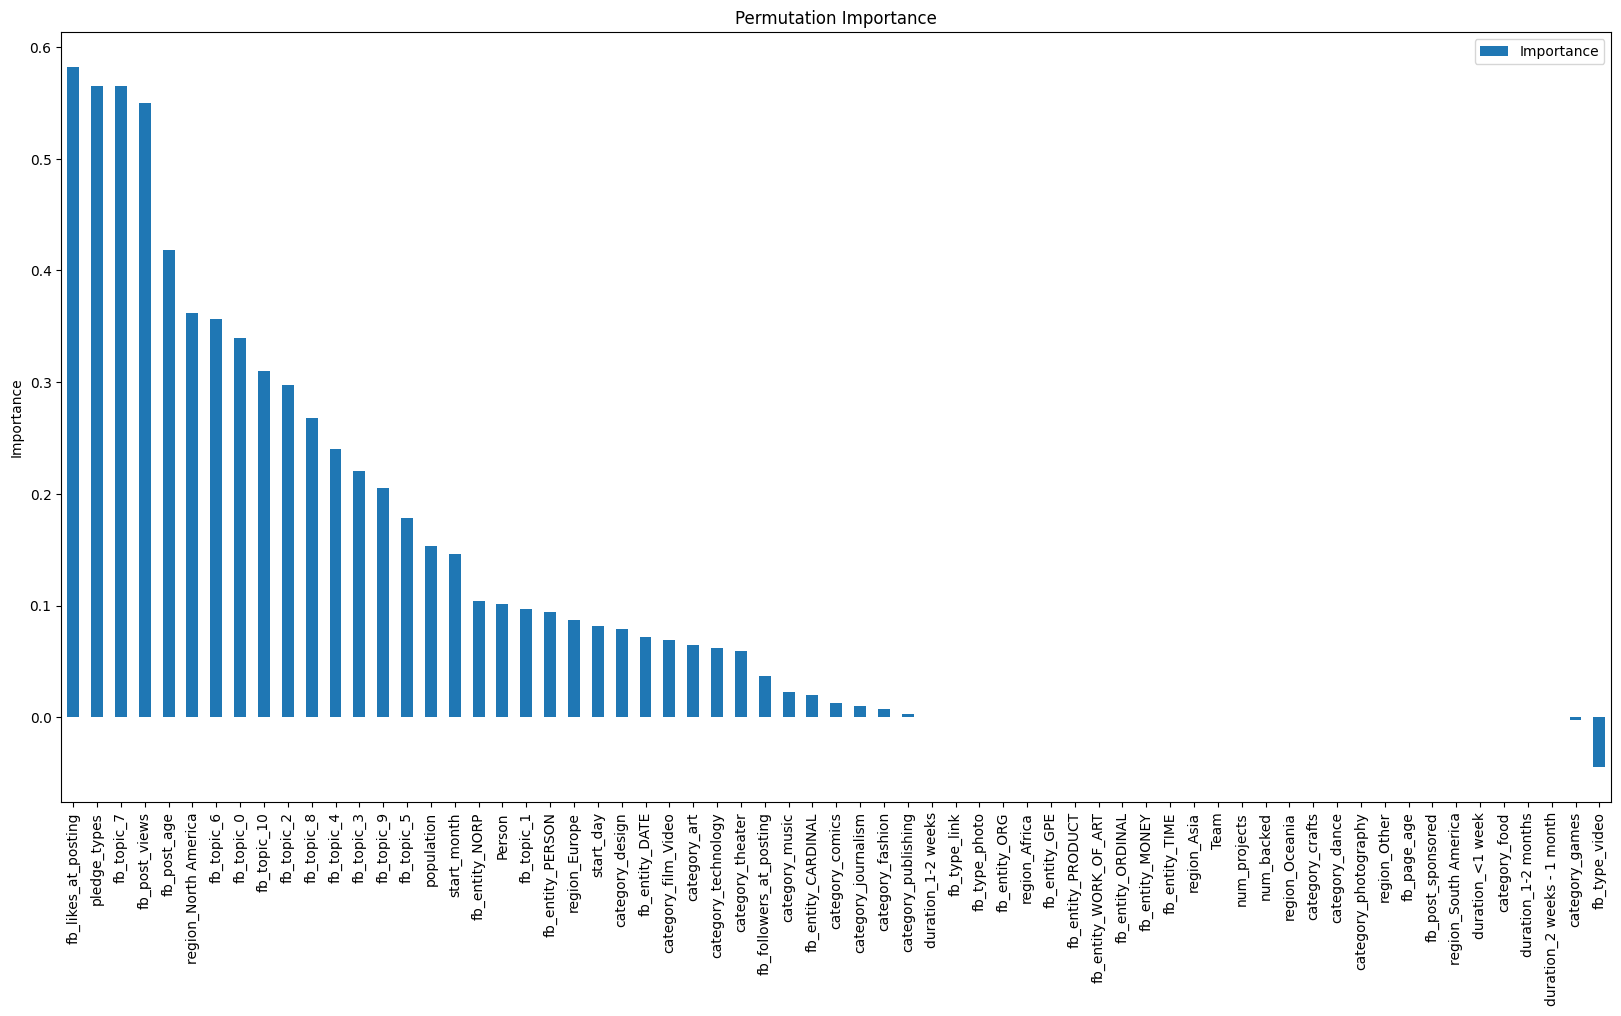

In [160]:
from success_utils import *
model = CustomEnsemble(
    model1=BalancedRandomForestClassifier,
    model2=RUSBoostClassifier,
)

model = joblib.load('/workspaces/Crowdfunding-Social-Media-Drivers/Modelling/02_success_engagement/domain_post_success.pkl')
plot_permutation_importance(model, X_test_scaled, y_test.success, imp_columns=X_test.columns)
